In [20]:
import pandas as pd

df=pd.read_excel('flight_price.xlsx')

In [21]:
df.shape

(10683, 11)

In [22]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [24]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y')



In [25]:
df['Days']=df['Date_of_Journey'].dt.day
df['Months']=df['Date_of_Journey'].dt.month
df['Years']=df['Date_of_Journey'].dt.year


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  Days             10683 non-null  int32         
 12  Months           10683 non-null  int32         
 13  Years            10683 non-null  int32         
dtypes: datetime64[ns](1), int32(3), int64(

In [27]:
df.drop(columns=['Date_of_Journey'],inplace=True)

In [28]:
df['Hours']=df['Dep_Time'].str.split(':').str[0]
df['Minnutes']=df['Dep_Time'].str.split(':').str[1]

In [29]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Days,Months,Years,Hours,Minnutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [30]:
df['DEPT_Hours']=df['Hours'].astype(int)
df['DEPT_Minnutes']=df['Minnutes'].astype(int)


In [31]:
df.drop(columns=['Dep_Time'],inplace=True)

In [32]:
df['Arrival_Time']=df['Arrival_Time'].str.split(' ').str[0]

In [33]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Days,Months,Years,Hours,Minnutes,DEPT_Hours,DEPT_Minnutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10,2h 50m,non-stop,No info,3897,24,3,2019,22,20,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,05,50,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25,19h,2 stops,No info,13882,9,6,2019,09,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,05,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,16,50


In [34]:
df['Ar_Hour']=df['Arrival_Time'].str.split(':').str[0]
df['Ar-Min']=df['Arrival_Time'].str.split(':').str[1]

In [35]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Days,Months,Years,Hours,Minnutes,DEPT_Hours,DEPT_Minnutes,Ar_Hour,Ar-Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10,2h 50m,non-stop,No info,3897,24,3,2019,22,20,22,20,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,05,50,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25,19h,2 stops,No info,13882,9,6,2019,09,25,9,25,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,05,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,16,50,21,35


In [36]:
df['Ar_Hour']=df['Ar_Hour'].astype(int)



In [37]:
df['Ar-Min']=df['Ar-Min'].astype(int)

In [38]:
df.drop(columns=['Arrival_Time'],inplace=True)

In [39]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Days,Months,Years,Hours,Minnutes,DEPT_Hours,DEPT_Minnutes,Ar_Hour,Ar-Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,05,50,5,50,13,15


In [40]:
df['Duration']=df['Duration'].map(lambda x: x.replace('h','').replace('m','').strip())

In [41]:
df['Duration_Hr']=df['Duration'].str.split(' ').str[0]
df['Duration_Min']=df['Duration'].str.split(' ').str[0]


In [42]:
df['Duration_Hr']=df['Duration_Hr'].astype(int)
df['Duration_Min']=df['Duration_Min'].astype(int)


In [43]:
df.drop(columns=['Duration'],inplace=True)

In [44]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Days,Months,Years,Hours,Minnutes,DEPT_Hours,DEPT_Minnutes,Ar_Hour,Ar-Min,Duration_Hr,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,22,20,1,10,2,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,05,50,5,50,13,15,7,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,09,25,9,25,4,25,19,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,05,18,5,23,30,5,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,16,50,21,35,4,4


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Source           10683 non-null  object 
 2   Destination      10683 non-null  object 
 3   Route            10682 non-null  object 
 4   Total_Stops      3492 non-null   float64
 5   Additional_Info  10683 non-null  object 
 6   Price            10683 non-null  int64  
 7   Days             10683 non-null  int32  
 8   Months           10683 non-null  int32  
 9   Years            10683 non-null  int32  
 10  Hours            10683 non-null  object 
 11  Minnutes         10683 non-null  object 
 12  DEPT_Hours       10683 non-null  int64  
 13  DEPT_Minnutes    10683 non-null  int64  
 14  Ar_Hour          10683 non-null  int64  
 15  Ar-Min           10683 non-null  int64  
 16  Duration_Hr      10683 non-null  int64  
 17  Duration_Min

In [57]:
import numpy as np

df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [46]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Days,Months,Years,Hours,Minnutes,DEPT_Hours,DEPT_Minnutes,Ar_Hour,Ar-Min,Duration_Hr,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,No info,3897,24,3,2019,22,20,22,20,1,10,2,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,NaN,No info,7662,1,5,2019,05,50,5,50,13,15,7,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,NaN,No info,13882,9,6,2019,09,25,9,25,4,25,19,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,NaN,No info,6218,12,5,2019,18,05,18,5,23,30,5,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,NaN,No info,13302,1,3,2019,16,50,16,50,21,35,4,4


In [47]:
data=df[df['Airline']=='IndiGo']

In [48]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Days,Months,Years,Hours,Minnutes,DEPT_Hours,DEPT_Minnutes,Ar_Hour,Ar-Min,Duration_Hr,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,No info,3897,24,3,2019,22,20,22,20,1,10,2,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,NaN,No info,6218,12,5,2019,18,05,18,5,23,30,5,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,NaN,No info,13302,1,3,2019,16,50,16,50,21,35,4,4
11,IndiGo,Kolkata,Banglore,CCU → BLR,0.0,No info,4174,18,4,2019,20,20,20,20,22,55,2,2
14,IndiGo,Kolkata,Banglore,CCU → BLR,0.0,No info,4804,24,4,2019,17,15,17,15,19,50,2,2


In [49]:
data[data['Source']=='Kolkata']

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Days,Months,Years,Hours,Minnutes,DEPT_Hours,DEPT_Minnutes,Ar_Hour,Ar-Min,Duration_Hr,Duration_Min
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,NaN,No info,6218,12,5,2019,18,05,18,5,23,30,5,5
11,IndiGo,Kolkata,Banglore,CCU → BLR,0.0,No info,4174,18,4,2019,20,20,20,20,22,55,2,2
14,IndiGo,Kolkata,Banglore,CCU → BLR,0.0,No info,4804,24,4,2019,17,15,17,15,19,50,2,2
133,IndiGo,Kolkata,Banglore,CCU → BLR,0.0,No info,4804,15,6,2019,20,25,20,25,23,10,2,2
188,IndiGo,Kolkata,Banglore,CCU → BLR,0.0,No info,4804,3,6,2019,15,30,15,30,18,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10574,IndiGo,Kolkata,Banglore,CCU → HYD → BLR,NaN,No info,3574,21,5,2019,19,20,19,20,23,45,4,4
10620,IndiGo,Kolkata,Banglore,CCU → BLR,0.0,No info,4174,6,4,2019,17,15,17,15,19,50,2,2
10621,IndiGo,Kolkata,Banglore,CCU → BLR,0.0,No info,4804,27,6,2019,22,15,22,15,0,50,2,2
10649,IndiGo,Kolkata,Banglore,CCU → BLR,0.0,No info,4778,1,3,2019,21,25,21,25,0,5,2,2


In [50]:
data1=data[data['Destination']=='Banglore']

In [51]:
data1

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Days,Months,Years,Hours,Minnutes,DEPT_Hours,DEPT_Minnutes,Ar_Hour,Ar-Min,Duration_Hr,Duration_Min
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,NaN,No info,6218,12,5,2019,18,05,18,5,23,30,5,5
11,IndiGo,Kolkata,Banglore,CCU → BLR,0.0,No info,4174,18,4,2019,20,20,20,20,22,55,2,2
14,IndiGo,Kolkata,Banglore,CCU → BLR,0.0,No info,4804,24,4,2019,17,15,17,15,19,50,2,2
133,IndiGo,Kolkata,Banglore,CCU → BLR,0.0,No info,4804,15,6,2019,20,25,20,25,23,10,2,2
188,IndiGo,Kolkata,Banglore,CCU → BLR,0.0,No info,4804,3,6,2019,15,30,15,30,18,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10574,IndiGo,Kolkata,Banglore,CCU → HYD → BLR,NaN,No info,3574,21,5,2019,19,20,19,20,23,45,4,4
10620,IndiGo,Kolkata,Banglore,CCU → BLR,0.0,No info,4174,6,4,2019,17,15,17,15,19,50,2,2
10621,IndiGo,Kolkata,Banglore,CCU → BLR,0.0,No info,4804,27,6,2019,22,15,22,15,0,50,2,2
10649,IndiGo,Kolkata,Banglore,CCU → BLR,0.0,No info,4778,1,3,2019,21,25,21,25,0,5,2,2


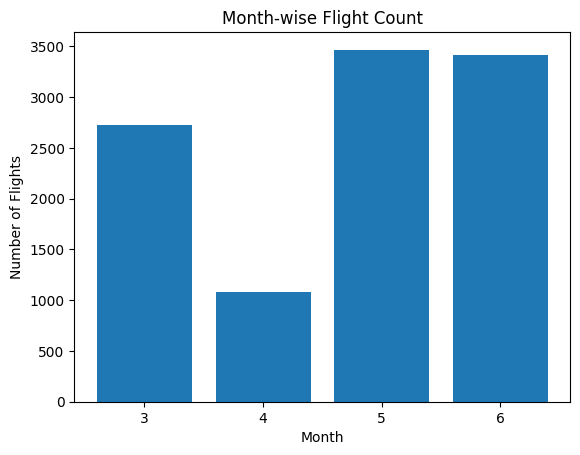

In [52]:
import matplotlib.pyplot as plt

month_counts=df['Months'].value_counts()



plt.figure()
plt.bar(month_counts.index, month_counts.values)
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.title('Month-wise Flight Count')

plt.xticks(month_counts.index)
plt.show()

In [53]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Days,Months,Years,Hours,Minnutes,DEPT_Hours,DEPT_Minnutes,Ar_Hour,Ar-Min,Duration_Hr,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,No info,3897,24,3,2019,22,20,22,20,1,10,2,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,NaN,No info,7662,1,5,2019,05,50,5,50,13,15,7,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,NaN,No info,13882,9,6,2019,09,25,9,25,4,25,19,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,NaN,No info,6218,12,5,2019,18,05,18,5,23,30,5,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,NaN,No info,13302,1,3,2019,16,50,16,50,21,35,4,4
